<a href="https://colab.research.google.com/github/rabastos44/Bootcamp-Data-Science-Alura/blob/master/Desafios_Modulo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


# Dados Modulo 1

In [2]:
dados = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A160324189_28_143_208.csv",
                    encoding="ISO-8859-1", 
                    skiprows = 3, sep=";", skipfooter=12,
                    thousands=".", decimal=",")

colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0, "Unidade da Federação")
usaveis = dados[colunas_usaveis]
usaveis = usaveis.set_index("Unidade da Federação")
usaveis = usaveis.drop("Total", axis=1)
usaveis["Total"] = usaveis.sum(axis=1) # [0,1,2] ["SP"]
ordenado_por_total = usaveis.sort_values("Total", ascending=False)
ordenado_por_total = ordenado_por_total.drop("Total", axis=1)
colunas_interessadas = ordenado_por_total.columns[6:]
ordenado_por_total = ordenado_por_total[colunas_interessadas]
ordenado_por_total = ordenado_por_total / 1000000
meses_filtrados = ordenado_por_total.columns[47:150]
mes_mais_recente = ordenado_por_total.columns[-1]
gastos_do_mais_recente = ordenado_por_total[mes_mais_recente]
gastos_do_mais_recente = gastos_do_mais_recente.sort_values(ascending=False)
gastos_proporcionais = gastos_do_mais_recente / gastos_do_mais_recente.sum()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


#Modulo 2 - Desafios

##Aula 1

###Desafio 01 - Entre nos dados do wikipedia e Leia a Base de dados direto do wikipedia.



In [3]:
wiki = pd.read_html("https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o")
tabela_populacao = wiki[0]
tabela_populacao[['Unidade federativa','População']]


,Unidade federativa,População
0,São Paulo,46 289 333
1,Minas Gerais,21 292 666
2,Rio de Janeiro,17 366 189
3,Bahia,14 930 634
4,Paraná,11 516 840
5,Rio Grande do Sul,11 422 973
6,Pernambuco,9 616 621
7,Ceará,9 187 103
8,Pará,8 690 745
9,Santa Catarina,7 252 502


###Desafio 02 - Neste desafio temos uma série de passos:

- Padronizar os nomes das colunas
- Transformar os dados nos tipos corretos
- Transformar a UF em index

In [4]:
# - Padronizar os nomes das colunas
populacao = tabela_populacao.loc[:,['Unidade federativa','População']]
populacao['populacao']= populacao.loc[:,'População']
populacao['uf'] = populacao.loc[:,'Unidade federativa'] 
populacao = populacao[['uf','populacao']]
# - Transformar os dados nos tipos corretos
populacao['populacao']= populacao['populacao'].str.replace(' ','').astype(int)
# - Transformar a UF em index
populacao.set_index('uf', inplace=True)

###Desafio 03 - Buscar na documentação alguns métodos envolvendo strings






In [5]:
populacao.index.str.split(" ")

Index([                ['São', 'Paulo'],              ['Minas', 'Gerais'],
               ['Rio', 'de', 'Janeiro'],                        ['Bahia'],
                             ['Paraná'],   ['Rio', 'Grande', 'do', 'Sul'],
                         ['Pernambuco'],                        ['Ceará'],
                               ['Pará'],            ['Santa', 'Catarina'],
                           ['Maranhão'],                        ['Goiás'],
                           ['Amazonas'],            ['Espírito', 'Santo'],
                            ['Paraíba'], ['Rio', 'Grande', 'do', 'Norte'],
                     ['Mato', 'Grosso'],                      ['Alagoas'],
                              ['Piauí'],          ['Distrito', 'Federal'],
        ['Mato', 'Grosso', 'do', 'Sul'],                      ['Sergipe'],
                           ['Rondônia'],                    ['Tocantins'],
                               ['Acre'],                        ['Amapá'],
                         

In [6]:
populacao.index.str.lower()

Index(['são paulo', 'minas gerais', 'rio de janeiro', 'bahia', 'paraná',
       'rio grande do sul', 'pernambuco', 'ceará', 'pará', 'santa catarina',
       'maranhão', 'goiás', 'amazonas', 'espírito santo', 'paraíba',
       'rio grande do norte', 'mato grosso', 'alagoas', 'piauí',
       'distrito federal', 'mato grosso do sul', 'sergipe', 'rondônia',
       'tocantins', 'acre', 'amapá', 'roraima'],
      dtype='object', name='uf')

In [7]:
populacao.index.str.startswith('Mato')

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False])

In [8]:
populacao.index.str.rfind('Sul')

Int64Index([-1, -1, -1, -1, -1, 14, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
            -1, -1, -1, 15, -1, -1, -1, -1, -1, -1],
           dtype='int64', name='uf')

In [9]:
populacao.index.str[3:]

Index([' Paulo', 'as Gerais', ' de Janeiro', 'ia', 'aná', ' Grande do Sul',
       'nambuco', 'rá', 'á', 'ta Catarina', 'anhão', 'ás', 'zonas',
       'írito Santo', 'aíba', ' Grande do Norte', 'o Grosso', 'goas', 'uí',
       'trito Federal', 'o Grosso do Sul', 'gipe', 'dônia', 'antins', 'e',
       'pá', 'aima'],
      dtype='object', name='uf')

In [10]:
populacao.index

Index(['São Paulo', 'Minas Gerais', 'Rio de Janeiro', 'Bahia', 'Paraná',
       'Rio Grande do Sul', 'Pernambuco', 'Ceará', 'Pará', 'Santa Catarina',
       'Maranhão', 'Goiás', 'Amazonas', 'Espírito Santo', 'Paraíba',
       'Rio Grande do Norte', 'Mato Grosso', 'Alagoas', 'Piauí',
       'Distrito Federal', 'Mato Grosso do Sul', 'Sergipe', 'Rondônia',
       'Tocantins', 'Acre', 'Amapá', 'Roraima'],
      dtype='object', name='uf')

###Desafio 04 - Desenvolver uma função para a limpeza e tratamento dos dados, retornando duas tabelas "população" e "unida".


In [11]:
def adiciona_populacao(gastos_fonte, populacao_fonte):
  populacao = populacao_fonte.loc[:,['Unidade federativa','População']]
  populacao['populacao']= populacao.loc[:,'População']
  populacao['uf'] = populacao.loc[:,'Unidade federativa'] 
  populacao = populacao[['uf','populacao']]
  populacao['populacao']= populacao['populacao'].str.replace(' ','').astype(int)
  populacao.set_index('uf',inplace=True)
  populacao.index.str.strip()

  gastos = gastos_fonte.copy()
  gastos.index = gastos_fonte.index.str[3:]

  unida = populacao.join(gastos)
  unida['gastos'] = unida[unida.columns[1]]
  unida = unida.drop(unida.columns[1],axis=1)
  return populacao,unida

populacao, gastos_e_populacao = adiciona_populacao(gastos_do_mais_recente,tabela_populacao)


##Aula 2

###Desafio 01: Ordenar o gráfico e criar uma visualização de gastos por habitantes ordenada por habitante.



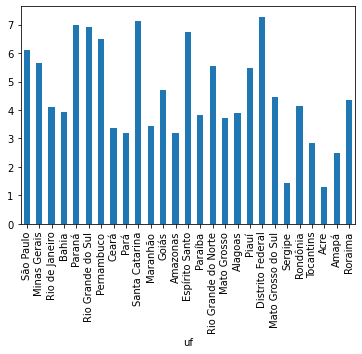

In [12]:
gastos_e_populacao["gasto_por_habitante"] = gastos_e_populacao["gastos"]*1000000 / gastos_e_populacao["populacao"]
gastos_ordenado_por_populacao = gastos_e_populacao.sort_values('gastos',ascending=False)
gastos_e_populacao['gasto_por_habitante'].plot(kind='bar')

###Desafio 02 (Super Desafio Gui): Fazer os mesmos gráficos do final da aulas 2.1 para meses anteriores, analisar e compartilhar suas hipóteses.



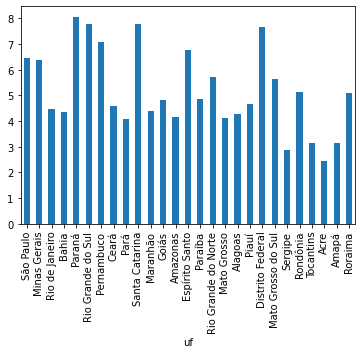

In [13]:
mes_anterior_recente = ordenado_por_total.columns[-2]
gastos_mes_anterior = ordenado_por_total[mes_anterior_recente]*1000000

populacao, unida_anterior= adiciona_populacao(gastos_mes_anterior, tabela_populacao)
unida_anterior['gasto_por_habitante'] = unida_anterior['gastos']/unida_anterior['populacao']

unida_anterior['gasto_por_habitante'].plot(kind='bar')

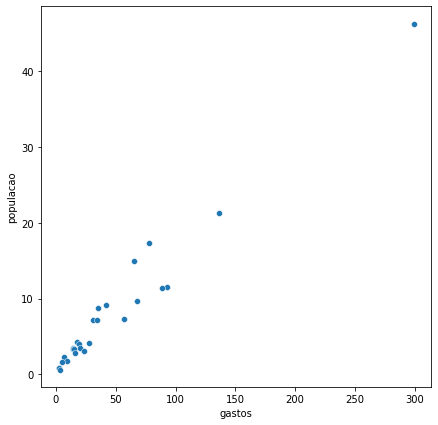

In [14]:
import seaborn as sns

plt.figure(figsize=(7,7))
sns.scatterplot(data=unida_anterior/1000000 , x ='gastos', y='populacao')

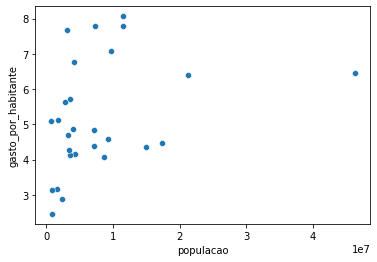

In [15]:
sns.scatterplot(data=unida_anterior, x="populacao", y="gasto_por_habitante")


###Desafio 03 (Super Desafio Thiago): Plotar no mesmos gráficos do final da aula o mês anterior e o mês correte, analisar e compartilhar suas hipóteses.



In [16]:
def insere_gastos_e_gasto_por_habitante_para(todos_os_gastos: pd.DataFrame, dados: pd.DataFrame, mes: str):
  gastos_do_mes = todos_os_gastos[mes]
  gastos_do_mes.index = gastos_do_mes.index.str[3:]
  dados[f"gastos_{mes}"] = gastos_do_mes 
  dados[f"gasto_por_habitante_{mes}"] = dados[f"gastos_{mes}"]*1000000/ dados["populacao"]


In [17]:
insere_gastos_e_gasto_por_habitante_para(ordenado_por_total,gastos_e_populacao,'2020/Jun')
gastos_e_populacao.head()

,populacao,gastos,gasto_por_habitante,gastos_2020/Jun,gasto_por_habitante_2020/Jun
uf,,,,,
São Paulo,46289333,282.709570,6.107445,299.060852,0.000006
Minas Gerais,21292666,120.467187,5.657685,135.977572,0.000006
Rio de Janeiro,17366189,71.540227,4.119512,77.604925,0.000004
Bahia,14930634,58.898100,3.944782,65.159301,0.000004
Paraná,11516840,80.320853,6.974209,92.901461,0.000008


In [43]:

gastos_mensais = gastos_e_populacao[['populacao',
                    'gastos_2020/Jun',
                    'gastos_2020/Jul']]

gastos_mensais = gastos_mensais.reset_index()
gastos_mensais_melt = gastos_mensais.melt(id_vars=['uf','populacao'],var_name='mes',value_name='valor')
gastos_mensais_melt.head()

,uf,populacao,mes,valor
0,São Paulo,46289333,gastos_2020/Jun,299.060852
1,Minas Gerais,21292666,gastos_2020/Jun,135.977572
2,Rio de Janeiro,17366189,gastos_2020/Jun,77.604925
3,Bahia,14930634,gastos_2020/Jun,65.159301
4,Paraná,11516840,gastos_2020/Jun,92.901461


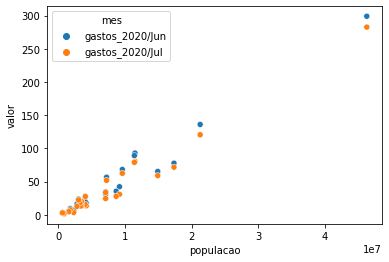

In [44]:
import seaborn as sns

axis = sns.scatterplot(data = gastos_mensais_melt, x='populacao', y='valor', hue= 'mes')


###Desafio 04 (Próximo Vídeo): Analise os gráficos e tente chegar a hipóteses que explicam o que você está entendendo dos dados. Lembre-se que a conclusão é uma hipótese. E que esses dados serão alterados.
 
